In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
df = pd.read_csv('ber.csv')
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df['month'] = df['date'].dt.to_period('M')

In [3]:
df.groupby('cat')['amt'].count().sort_values(ascending=False)

cat
Supermarkets                68
Restaurants/Alcohol         68
Travel/ Entertainment       61
Merchandise                 50
Payments and Credits        17
Services                    16
Misc Expenses                7
Rent                         4
Medical Services             4
Home Improvement             2
Utilities                    1
Shopping + Entertainment     1
Name: amt, dtype: int64

In [4]:
df.groupby('cat')['amt'].sum().sort_values(ascending=False)

cat
Merchandise                 2824.44
Rent                        1596.60
Travel/ Entertainment       1255.27
Supermarkets                 947.13
Restaurants/Alcohol          816.61
Medical Services             533.72
Misc Expenses                271.56
Services                     170.95
Utilities                     62.96
Home Improvement              31.09
Shopping + Entertainment      26.25
Payments and Credits       -5426.59
Name: amt, dtype: float64

Weeee fun


Taking weekly goals for Groceries, Restaurant & Dining, Shopping & Entertainment----> EACH = 100

In [0]:
a = df['cat'] == 'Merchandise' #tr
b = df['cat'] == 'Travel/ Entertainment' #tr
c = df['cat'] == 'Home Improvement' #sh
d = df['cat'] == 'Supermarkets' #gr
e = df['cat'] == 'Shopping + Entertainment' #sh
f = df['cat'] == 'Misc Expenses ' #gr
g = df['cat'] == 'Restaurants/Alcohol' #din

In [0]:
din = df[g].groupby('date')['amt'].sum()
gr = df[d | f].groupby('date')['amt'].sum()
sh = df[c | e].groupby('date')['amt'].sum()
tr = df[a | b].groupby('date')['amt'].sum()

In [0]:
days = df.date.unique()

In [0]:
dins = []
grs = []
shop = []
tre = []
for z in days:
    if z in din:
        dins.append(din[z])
    else:
        dins.append(0)
    if z in gr:
        grs.append(gr[z])
    else:
        grs.append(0)
    if z in sh:
        shop.append(sh[z])
    else:
        shop.append(0)
    if z in tr:
        tre.append(tr[z])
    else:
        tre.append(0)

In [0]:
daily = pd.DataFrame({'din':dins, 'gr':grs, 'sh':shop, 'tr':tre})

In [0]:
daily['w_gr'] = daily['gr'].rolling(7).sum().shift(1)
daily['w_sh'] = daily['sh'].rolling(7).sum().shift(1)
daily['w_din'] = daily['din'].rolling(7).sum().shift(1)
daily['w_tr'] = daily['tr'].rolling(7).sum().shift(1)

In [0]:
daily['w_gr'] = daily['w_gr']/7
daily['w_sh'] = daily['w_sh']/7
daily['w_din'] = daily['w_din']/7
daily['w_tr'] = daily['w_tr']/7

In [13]:
len(daily)

83

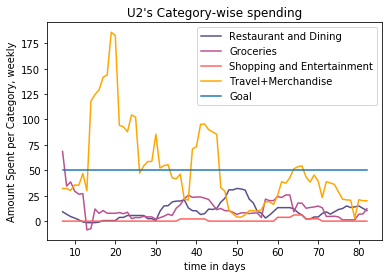

In [14]:
pl1 = plt.plot(daily['w_din'],c="#58508d")
pl2 = plt.plot(daily['w_gr'], c="#bc5090")
pl3 = plt.plot(daily['w_sh'], c="#ff6361")
pl4 = plt.plot(daily['w_tr'], c="#ffa600")
pl5 = plt.plot(range(7,83),[50]*76)
plt.ylabel("Amount Spent per Category, weekly")
plt.xlabel("time in days")
plt.title("U2's Category-wise spending")
plt.legend((pl1[0], pl2[0],pl3[0],pl4[0],pl5[0]), ('Restaurant and Dining', 'Groceries', 'Shopping and Entertainment','Travel+Merchandise','Goal'))
plt.show()

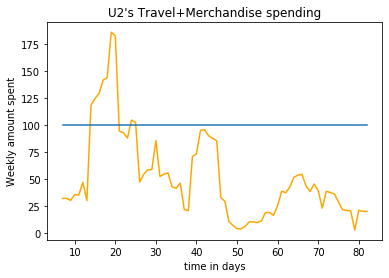

In [16]:
plt.plot(daily['w_tr'], c="#ffa600")
plt.plot(range(7,83),[100]*76)
plt.ylabel("Weekly amount spent")
plt.xlabel("time in days")
plt.title("U2's Travel+Merchandise spending")
plt.show()

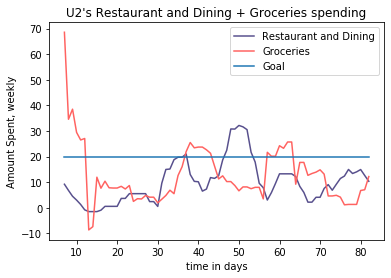

In [18]:
pl1 = plt.plot(daily['w_din'],c="#58508d")
pl2 = plt.plot(daily['w_gr'], c="#ff6361")
# pl3 = plt.plot(daily['w_sh'], c="#ff6361")
# pl4 = plt.plot(daily['w_tr'], c="#ffa600")
pl5 = plt.plot(range(7,83),[20]*76)
plt.ylabel("Amount Spent, weekly")
plt.xlabel("time in days")
plt.title("U2's Restaurant and Dining + Groceries spending")
plt.legend((pl1[0], pl2[0],pl5[0]), ('Restaurant and Dining', 'Groceries','Goal'))
plt.show()